# Train a deep neural network to identify Covid-19 CT scans

In [ ]:
import tensorflow as tf
assert tf.__version__.startswith('2')

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tf.__version__

'2.2.0'

In [ ]:
base_dir='/content/drive/My Drive/Colab Notebooks/datasets/CT-Scans'

In [ ]:
IMAGE_SIZE=224
BATCH_SIZE=64

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    1./255,
    validation_split=0.1
)
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='validation')

Found 673 images belonging to 2 classes.
Found 73 images belonging to 2 classes.


In [ ]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


((64, 224, 224, 3), (64, 2))

In [ ]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'CT_COVID': 0, 'CT_NonCOVID': 1}


In [ ]:
!cat labels.txt

CT_COVID
CT_NonCOVID

#show some example images

##Covid 19 CT scan

In [ ]:
import cv2

Covid 19 CT scan


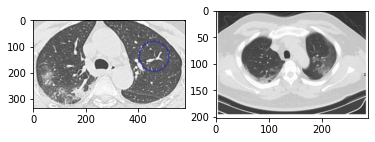

In [ ]:
root1='/content/drive/My Drive/Colab Notebooks/datasets/CT-Scans/CT_COVID/2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-89%0.png'
root2='/content/drive/My Drive/Colab Notebooks/datasets/CT-Scans/CT_COVID/2020.02.10.20021584-p6-52%0.png'
print('Covid 19 CT scan')
plt.subplot(1,2,1)
plt.imshow(cv2.imread(root1,cv2.IMREAD_COLOR))
plt.subplot(1,2,2)
plt.imshow(cv2.imread(root2,cv2.IMREAD_COLOR))

Non-Covid 19 CT scan


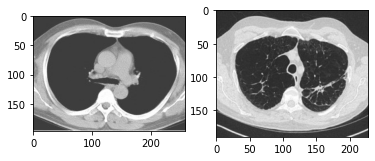

In [ ]:
root3='/content/drive/My Drive/Colab Notebooks/datasets/CT-Scans/CT_NonCOVID/1%0.jpg'
root4='/content/drive/My Drive/Colab Notebooks/datasets/CT-Scans/CT_NonCOVID/10%2.jpg'
print('Non-Covid 19 CT scan')
plt.subplot(1,2,1)
plt.imshow(cv2.imread(root3,cv2.IMREAD_COLOR))
plt.subplot(1,2,2)
plt.imshow(cv2.imread(root4,cv2.IMREAD_COLOR))

#Create the base model from the pre-trained convnets

Create the base model from MobileNet V2 model developed at Google, and pre-trained on the ImageNet dataset, a a large dataset of 1.4M images and 1000 classes of web images

In [ ]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.DenseNet121(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')
#base_model.summary()

29089792/29084464 [==============================] - 0s 0us/step


##We will freeze the convolutional base and add a classifier on top of it.

In [ ]:
base_model.trainable=False

In [ ]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(64, 3, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, 3, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  #tf.keras.layers.Conv2D(32, 3, activation='relu'),
  #tf.keras.layers.Dropout(0.4),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 7, 7, 1024)        7037504   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 64)          589888    
_________________________________________________________________
batch_normalization_4 (Batch (None, 5, 5, 64)          256       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
batch_normalization_5 (Batch (None, 3, 3, 64)          256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 1, 64)         

## Train the model

In [ ]:
epochs = 50

history = model.fit(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=epochs, 
                    validation_data=val_generator, 
                    validation_steps=len(val_generator))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
11/11 [==============================] - 11s 988ms/step - loss: 0.8618 - accuracy: 0.6939 - val_loss: 7.3179 - val_accuracy: 0.4658
Epoch 2/50
11/11 [==============================] - 6s 587ms/step - loss: 0.5550 - accuracy: 0.8187 - val_loss: 4.5572 - val_accuracy: 0.4658
Epoch 3/50
11/11 [==============================] - 6s 578ms/step - loss: 0.4440 - accuracy: 0.8841 - val_loss: 3.3591 - val_accuracy: 0.5068
Epoch 4/50
11/11 [==============================] - 6s 585ms/step - loss: 0.3613 - accuracy: 0.9257 - val_loss: 1.4702 - val_accuracy: 0.6438
Epoch 5/50
11/11 [==============================] - 6s 591ms/step - loss: 0.2919 - accuracy: 0.9584 - val_loss: 1.0240 - val_accuracy: 0.6849
Epoch 6/50
11/11 [==============================] - 6s 576ms/step - loss: 0.2340 - accuracy: 0.9733 - val_loss: 1.2250 - val_accuracy: 0.6438
Epoch 7/50
11/11 [==============================] - 6s 585ms/step - loss: 0.1908 - accuracy: 0.9896 - val_loss: 0.9416 - val_accuracy: 0.6986
Epoch

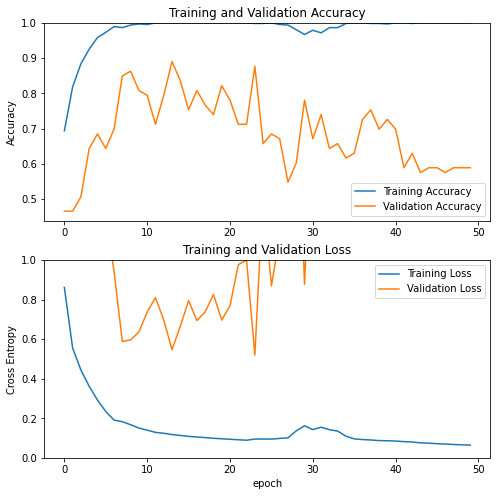

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

##Due to lack of tranning data, the model overfits to much. The best performance we can get by transfer learning is about 70% accuracy. To improve our performance, I decide to fine tune more layers.

In [ ]:
base_model_2 = tf.keras.applications.DenseNet121(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

In [ ]:
base_model_2.trainable = True

In [ ]:
# Fine tune from this layer onwards
fine_tune_at = 40

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model_2.layers[:fine_tune_at]:
  layer.trainable =  False

In [ ]:
model_2=tf.keras.Sequential([
  base_model_2,
  tf.keras.layers.Conv2D(64, 3, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, 3, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
model_2.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy',tf.keras.metrics.AUC(),tf.keras.metrics.Recall()])

In [ ]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 7, 7, 1024)        7037504   
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 5, 5, 64)          589888    
_________________________________________________________________
batch_normalization_20 (Batc (None, 5, 5, 64)          256       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
batch_normalization_21 (Batc (None, 3, 3, 64)          256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 1, 1, 64)        

In [ ]:
history_fine_2 = model_2.fit(train_generator, 
                         steps_per_epoch=len(train_generator), 
                         epochs=50, 
                         validation_data=val_generator, 
                         validation_steps=len(val_generator))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
11/11 [==============================] - 8s 710ms/step - loss: 18.9999 - accuracy: 0.6404 - auc_7: 0.6078 - recall_7: 0.6746 - val_loss: 18.2849 - val_accuracy: 0.4932 - val_auc_7: 0.5279 - val_recall_7: 0.8493
Epoch 2/50
11/11 [==============================] - 6s 540ms/step - loss: 17.4102 - accuracy: 0.8782 - auc_7: 0.8987 - recall_7: 0.8009 - val_loss: 17.3837 - val_accuracy: 0.5342 - val_auc_7: 0.5056 - val_recall_7: 0.8904
Epoch 3/50
11/11 [==============================] - 6s 536ms/step - loss: 16.2748 - accuracy: 0.9643 - auc_7: 0.9715 - recall_7: 0.9079 - val_loss: 16.4949 - val_accuracy: 0.5479 - val_auc_7: 0.5395 - val_recall_7: 0.8630
Epoch 4/50
11/11 [==============================] - 6s 540ms/step - loss: 15.2530 - accuracy: 0.9822 - auc_7: 0.9921 - recall_7: 0.9510 - val_loss: 15.5607 - val_accuracy: 0.5890 - val_auc_7: 0.5919 - val_recall_7: 0.9178
Epoch 5/50
11/11 [==============================] - 6s 538ms/step - loss: 14.3574 - accuracy: 0.9955 - auc_7: 0.

KeyboardInterrupt: ignored

In [ ]:
acc = history_fine_2.history['accuracy']
val_acc = history_fine_2.history['val_accuracy']

loss = history_fine_2.history['loss']
val_loss = history_fine_2.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

NameError: ignored

#Performance is not good at all. What if we try not do transfer learning? What if we build a simple cnn from scractch?

In [ ]:
model_3 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32,(3,3),padding='same',input_shape=(IMAGE_SIZE,IMAGE_SIZE,3),activation='relu'),
  #tf.keras.layers.Conv2D(64, 3, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(32, 3, padding='same',activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Dropout(0.2),


  tf.keras.layers.Conv2D(128, 3,padding='same', activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(128, 3,padding='same', activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Dropout(0.4),


  tf.keras.layers.Flatten(),
  #tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
model_3.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(5e-3),
              metrics=['accuracy'])

In [ ]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     3

In [ ]:
history_fine_3 = model_3.fit(train_generator, 
                         steps_per_epoch=len(train_generator), 
                         epochs=50, 
                         validation_data=val_generator, 
                         validation_steps=len(val_generator))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
11/11 [==============================] - 287s 26s/step - loss: 43.9092 - accuracy: 0.6508 - val_loss: 50696.9297 - val_accuracy: 0.4658
Epoch 2/50
11/11 [==============================] - 8s 689ms/step - loss: 20.1192 - accuracy: 0.7667 - val_loss: 5776.1719 - val_accuracy: 0.4795
Epoch 3/50
11/11 [==============================] - 7s 665ms/step - loss: 10.7389 - accuracy: 0.8202 - val_loss: 2813.7400 - val_accuracy: 0.6164
Epoch 4/50
11/11 [==============================] - 7s 677ms/step - loss: 7.5234 - accuracy: 0.8648 - val_loss: 881.6588 - val_accuracy: 0.7123
Epoch 5/50
11/11 [==============================] - 7s 677ms/step - loss: 4.2600 - accuracy: 0.9049 - val_loss: 465.3328 - val_accuracy: 0.7260
Epoch 6/50
11/11 [==============================] - 7s 669ms/step - loss: 3.4460 - accuracy: 0.8990 - val_loss: 230.1081 - val_accuracy: 0.7123
Epoch 7/50
11/11 [==============================] - 7s 672ms/step - loss: 2.3006 - accuracy: 0.9316 - val_loss: 253.8021 - val_ac

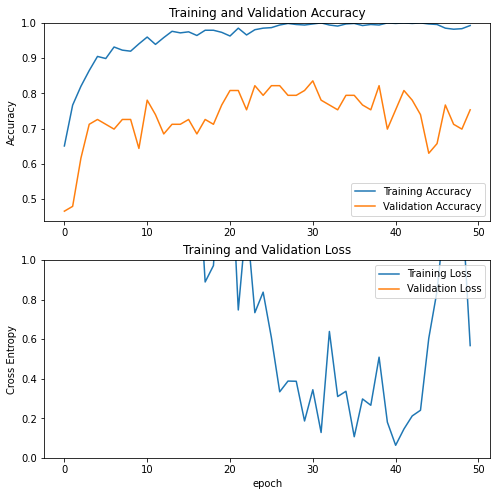

In [ ]:
acc = history_fine_3.history['accuracy']
val_acc = history_fine_3.history['val_accuracy']

loss = history_fine_3.history['loss']
val_loss = history_fine_3.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

#By creating a simpler architecture, the model performance can achieve an average of 70 percent, which is higher than doing transfer learning, however, the accuracy is still not enough. What if we can use data augumentaion to increase the size of our datasets?

In [ ]:
train_dir='/content/drive/My Drive/Colab Notebooks/datasets/CT/train'
test_dir='/content/drive/My Drive/Colab Notebooks/datasets/CT/validation'

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
        brightness_range=(0.8,1.2),
        horizontal_flip=True
        )
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    )

Found 629 images belonging to 2 classes.


In [ ]:
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    )

Found 117 images belonging to 2 classes.


Let's see how the augmentation looks

Using TensorFlow backend.


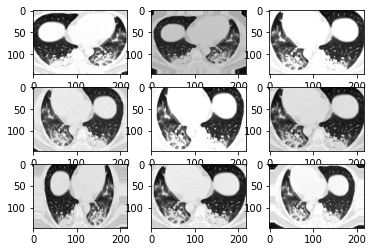

In [ ]:
# example of zoom image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('/content/drive/My Drive/Colab Notebooks/datasets/CT/train/CT_COVID/2020.02.23.20026856-p17-115%5.png')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# prepare iterator
it = train_datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0]
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [ ]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model_3 = tf.keras.applications.DenseNet121(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')
#base_model.summary()

In [ ]:
base_model_3.trainable=False

In [ ]:
model_4 = tf.keras.Sequential([
  base_model_3,
  tf.keras.layers.Conv2D(64, 3, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, 3, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  #tf.keras.layers.Conv2D(32, 3, activation='relu'),
  #tf.keras.layers.Dropout(0.4),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
model_4.compile(optimizer=tf.keras.optimizers.Adam(),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
epochs = 50

history = model_4.fit(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=epochs, 
                    validation_data=validation_generator, 
                    validation_steps=len(validation_generator))

NameError: ignored

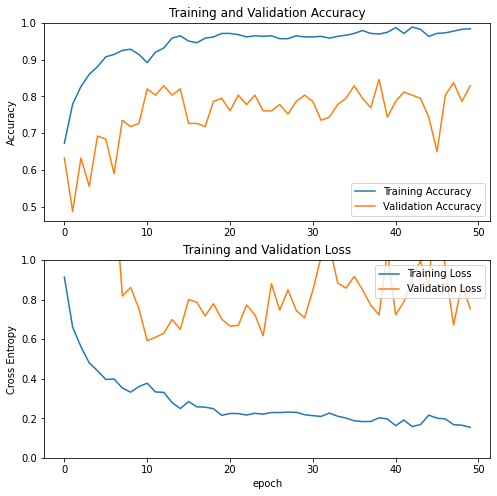

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

#Convert to TF model

In [ ]:
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(model_4, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: save/fine_tuning/assets


INFO:tensorflow:Assets written to: save/fine_tuning/assets


In [ ]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'CT_COVID': 0, 'CT_NonCOVID': 1}


In [ ]:
from google.colab import files

files.download('model.tflite')
files.download('labels.txt')

KeyboardInterrupt: ignored